In [1]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import imghdr
import os
import tensorflow as tf

In [2]:
#stop photos

# Set the path to the folder containing the images
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data'

# Create an empty list to store the images
X = []
y = []
pred_class = []
count = 0


for foldername in os.listdir(path_to_folder):
      
        path_to_sub_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\'+str(foldername)
# Loop over all the files in the folder
        
        
        
        for filename in os.listdir(path_to_sub_folder):
            # Check if the file is an image
           
          
            
  
            if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
                # Load the image using OpenCV
                try:

                        img = cv2.imread(os.path.join(path_to_sub_folder, filename))
                        resized_img = cv2.resize(img, (224, 224))
                        normalized_img = resized_img / 255.0

                        # Add the image to the list
                        X.append(normalized_img)
                        y.append(count)
                        


                except:       

                        image_path = str(path_to_sub_folder)+str(filename)

                        if os.path.exists(image_path):
                                os.remove(image_path)
                                print(f"Deleted {image_path}")
                        else:
                                print(f"{image_path} does not exist")
                                
                                
        pred_class.append(foldername)         
        count = count + 1

C:\Users\gillp\Downloads\deep learning\traffic sign\image data\Construction zone signRoad-Construction-Zones-–-Workers-in-Danger.jpeg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\do not enter115-1150048_sign-do-not-enter-placa-de-sinalização-em-ingles.png does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\do not enterのサイン.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\One way signSeñaletica_TW-04.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\One way signthumb-400-400-road-signs-board_1028.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\One way signニューヨークマンハッタン米国の道路標識入らないと片道.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\Pedestrian crossing signbc506546-10b0-46ae-a5b2-e1f89f248b12.jpg does not exist
C:\Users\gillp\Downloads\deep learning\traffic sign\image data\Pedestrian crossing signbef73

In [3]:
len(y)

3752

In [4]:
y_arr = np.array(y)
X_arr = np.array(X)

In [5]:
from sklearn.model_selection import train_test_split

X = X_arr  
y = y_arr  

# Perform the train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [7]:
cnn = models.Sequential([
    #cnn
    
    layers.Conv2D(filters = 32, activation = 'relu', input_shape=(224,224,3),  kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, activation = 'relu',  kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense 
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
    
])

In [8]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
83/83 [==============================] - 35s 417ms/step - loss: 2.8521 - accuracy: 0.2654
Epoch 2/10
83/83 [==============================] - 36s 430ms/step - loss: 1.4380 - accuracy: 0.5183
Epoch 3/10
83/83 [==============================] - 35s 417ms/step - loss: 0.8027 - accuracy: 0.7532
Epoch 4/10
83/83 [==============================] - 36s 427ms/step - loss: 0.3430 - accuracy: 0.9212
Epoch 5/10
83/83 [==============================] - 36s 436ms/step - loss: 0.1911 - accuracy: 0.9745
Epoch 6/10
83/83 [==============================] - 35s 424ms/step - loss: 0.1536 - accuracy: 0.9775
Epoch 7/10
83/83 [==============================] - 36s 434ms/step - loss: 0.1015 - accuracy: 0.9867
Epoch 8/10
83/83 [==============================] - 36s 440ms/step - loss: 0.1305 - accuracy: 0.9867
Epoch 9/10
83/83 [==============================] - 37s 440ms/step - loss: 0.1133 - accuracy: 0.9859
Epoch 10/10
83/83 [==============================] - 37s 440ms/step - loss: 0.0744 - accura

In [10]:
cnn.evaluate(X_test, y_test)

36/36 [==============================] - 5s 116ms/step - loss: 3.0482 - accuracy: 0.4503


[3.0481784343719482, 0.45026642084121704]

In [11]:
X_train.shape

(2626, 224, 224, 3)

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

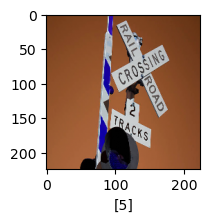

In [13]:
plot_sample(X_test, y_test,5)


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.39      0.52        99
           1       0.55      0.51      0.53        67
           2       0.62      0.37      0.47        54
           3       0.46      0.54      0.50       193
           4       0.40      0.57      0.47       222
           5       0.33      0.22      0.26        88
           6       0.37      0.37      0.37       115
           7       0.44      0.34      0.39       125
           8       0.49      0.53      0.51       131
           9       0.28      0.25      0.26        32

    accuracy                           0.45      1126
   macro avg       0.47      0.41      0.43      1126
weighted avg       0.47      0.45      0.45      1126



In [30]:
img = cv2.cvtColor(cv2.imread('430-4301539_construction-sign-png-download-image-construction-zone-construction.png'), cv2.COLOR_BGR2RGB)
img = img[:, :, :3]

img = cv2.resize(img, (224, 224))
img = np.array(img)
img = img / 255.0
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# Predict the class of the test image

predictions = cnn.predict(img)
class_index = np.argmax(predictions)
confidence_scores = predictions
probabilities = np.exp(confidence_scores) / np.sum(np.exp(confidence_scores))


In [22]:
pred_class[class_index]

'stop photos'

In [23]:
from PIL import Image
im = Image.open("430-4301539_construction-sign-png-download-image-construction-zone-construction.png") 
  
# This method will show image in any image viewer 
im.show()

In [19]:
from keras.models import load_model
cnn.save('model_n5.h5')

In [20]:
confidence_scores = predictions
# apply softmax function to obtain probabilities
probabilities = np.exp(confidence_scores) / np.sum(np.exp(confidence_scores))

print(probabilities)

[[0.08788502 0.08795063 0.18373734 0.08797234 0.10922305 0.09118028
  0.08788255 0.08791406 0.08835708 0.08789774]]
